## Technical Requirements

In [1]:
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [ ]:
# !pip install jupyter
# pip install snorkel
# pip install scikit-learn
# pip install Pillow
# pip install tensorflow
# pip install pandas
# pip install numpy

# Chapter 6 - Techniques for programmatic labelling

### Pattern Matching Labeling

In machine learning, one of the most important tasks is to label or classify data based on some criteria or patterns. However, labelling data manually can be time-consuming and costly, especially when dealing with a large amount of data. By leveraging predefined patterns, this labelling approach enables the automatic assignment of meaningful categories or classes to data instances.
Pattern matching involves the identification of specific patterns or sequences within data that can be used as indicators for assigning labels. These patterns can be defined using regular expressions, rule-based systems, or other pattern recognition algorithms. The objective is to capture relevant information and characteristics from the data that can be matched against predefined patterns to infer labels accurately.
Pattern matching can be applied to various domains and scenarios in machine learning. Some common applications include:
- Text classification: In natural language processing, pattern matching can be utilized to label text data based on specific keywords, phrases, or syntactic patterns. This enables tasks such as sentiment analysis, spam detection, and topic categorization.
- Image recognition: Pattern matching can aid in labelling images by identifying distinctive visual patterns or features that correspond to specific classes. This technique can be valuable in tasks like object recognition, facial detection, and image segmentation.
- Time series analysis: When dealing with time-dependent data, pattern matching can be employed to label sequences of events or patterns that occur over time. This is particularly useful in financial analysis, anomaly detection, and predicting stock market trends.
- Fraud detection: Pattern matching can play a crucial role in identifying fraudulent activities by matching suspicious patterns or anomalies against known fraud patterns. This technique can help in credit card fraud detection, network intrusion detection, and cybersecurity.
Pattern matching offers several advantages as a labelling technique in machine learning:
- Automation and efficiency: By automating the labelling process, pattern matching reduces the reliance on manual labelling, saving time and effort. It allows for large-scale dataset labelling with increased efficiency.
- Flexibility and adaptability: Patterns can be easily modified or extended to accommodate new data or evolving requirements. This provides flexibility in adapting to changing labelling criteria and ensures scalability.
- Interpretability: Pattern matching provides a transparent and interpretable approach to labelling, as the rules and patterns can be examined and understood. This aids in the transparency and explainability of the labelling process.
- Complementing other techniques: Pattern matching can be used in conjunction with other labelling techniques, such as weak supervision or transfer learning, to enhance the overall labelling accuracy and robustness of machine learning models.
While pattern matching is a valuable labelling technique, it also presents certain challenges and considerations:
- Noise and ambiguity: Data instances that do not perfectly match predefined patterns may introduce noise or ambiguity in the labelling process. Handling such cases requires careful design and consideration of pattern definitions.
- Scalability: As datasets grow larger, the scalability of pattern matching becomes crucial. Efficient algorithms and techniques must be employed to handle the increasing computational demands.
- Overfitting: Overfitting can occur if patterns are too specific and fail to generalize well to unseen data instances. Regularization techniques and cross-validation can be used to mitigate this risk.

In this section of the chapter, we will explore how to create pattern matching labeling functions using Python, and apply them to the ‘credit-g’ dataset. The credit-g dataset, also known as the German Credit dataset, is a collection of data points used for risk analysis in the field of finance and machine learning. It's used to classify people as good or bad credit risks based on a set of attributes.
The dataset consists of 20 variables, including both numerical and categorical data. These variables provide information about each individual, such as their checking account status, credit history, purpose of the loan, credit amount, savings account/bonds, employment, installment rate in percentage of disposable income, personal status and gender, and other attributes.
Each entry in the dataset represents an individual who has applied for a loan. The target variable indicates whether the individual is classified as a 'good' or 'bad' credit risk. This makes the dataset particularly useful for supervised machine learning tasks, especially binary classification problems.
The credit-g dataset is widely used in academia and industry for developing and testing machine learning models for credit risk assessment. It is available on several platforms like DataHub, Kaggle, OpenML, and UCI Machine Learning Repository.


We can start by loading the credit-g dataset into Python. The dataset contains information about loan applicants, including their demographic information, financial information, and loan approval status. We can use Pandas library to load the dataset and explore its structure.

In [4]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Fetch the credit-g dataset
credit_g = fetch_openml(name='credit-g',version=1)

# Convert to DataFrame
df = pd.DataFrame(credit_g.data, columns=credit_g.feature_names)
target = pd.Series(credit_g.target)

# If you want to add the target variable into your DataFrame
df['target'] = target

# Show top rows of the credit-g dataset
df.head().T


0                   1  \
checking_status                                     <0            0<=X<200   
duration                                           6.0                48.0   
credit_history          critical/other existing credit       existing paid   
purpose                                       radio/tv            radio/tv   
credit_amount                                   1169.0              5951.0   
savings_status                        no known savings                <100   
employment                                         >=7              1<=X<4   
installment_commitment                             4.0                 2.0   
personal_status                            male single  female div/dep/mar   
other_parties                                     none                none   
residence_since                                    4.0                 2.0   
property_magnitude                         real estate         real estate   
age                                               67.0                22.0   
other_payment_plans                               none                none   
housing                                            own                 own   
existing_credits                                   2.0                 1.0   
job                                            skilled             skilled   
num_dependents                                     1.0                 1.0   
own_telephone                                      yes                none   
foreign_worker                                     yes                 yes   
target                                            good                 bad   

                                                     2                    3  \
checking_status                            no checking                   <0   
duration                                          12.0                 42.0   
credit_history          critical/other existing credit        existing paid   
purpose                                      education  furniture/equipment   
credit_amount                                   2096.0               7882.0   
savings_status                                    <100                 <100   
employment                                      4<=X<7               4<=X<7   
installment_commitment                             2.0                  2.0   
personal_status                            male single          male single   
other_parties                                     none            guarantor   
residence_since                                    3.0                  4.0   
property_magnitude                         real estate       life insurance   
age                                               49.0                 45.0   
other_payment_plans                               none                 none   
housing                                            own             for free   
existing_credits                                   1.0                  1.0   
job                                 unskilled resident              skilled   
num_dependents                                     2.0                  2.0   
own_telephone                                     none                 none   
foreign_worker                                     yes                  yes   
target                                            good                 good   

                                         4  
checking_status                         <0  
duration                              24.0  
credit_history          delayed previously  
purpose                            new car  
credit_amount                       4870.0  
savings_status                        <100  
employment                          1<=X<4  
installment_commitment                 3.0  
personal_status                male single  
other_parties                         none  
residence_since                        4.0  
property_magnitude       no known property  
age         

Now that we have loaded the dataset, we can create pattern matching labelling functions. In this example, we will create two labelling functions that assign labels to loan applicants based on their income and credit history. The income_labeling_function assigns a label of 1 to loan applicants with an income greater than 5000, and a label of 0 to all others. The credit_history_labeling_function assigns a label of 1 to loan applicants with a credit history of 1, and a label of 0 to all others.
Given the features in the 'credit-g' dataset, we can create two labelling functions based on credit_amount and age. The credit_amount_labeling_function assigns a label of 1 to loan applicants with a credit amount greater than 5000, and a label of 0 to all others. The age_labeling_function assigns a label of 1 to loan applicants older than 30, and a label of 0 to all others.

In [5]:
def credit_amount_labeling_function(df):
    if df["credit_amount"] > 5000:
        return 1
    else:
        return 0

def age_labeling_function(df):
    if df["age"] > 30:
        return 1
    else:
        return 0

After creating the labelling functions, we can apply them to the 'credit-g' dataset. We can use the apply function in Pandas to apply the labelling functions to each row of the dataset. The apply function applies the labelling functions to each row of the dataset and assigns the labels to new columns in the dataset.

In [6]:
df["credit_amount_label"] = df.apply(credit_amount_labeling_function, axis=1)
df["age_label"] = df.apply(age_labeling_function, axis=1)
df.head().T

0                   1  \
checking_status                                     <0            0<=X<200   
duration                                           6.0                48.0   
credit_history          critical/other existing credit       existing paid   
purpose                                       radio/tv            radio/tv   
credit_amount                                   1169.0              5951.0   
savings_status                        no known savings                <100   
employment                                         >=7              1<=X<4   
installment_commitment                             4.0                 2.0   
personal_status                            male single  female div/dep/mar   
other_parties                                     none                none   
residence_since                                    4.0                 2.0   
property_magnitude                         real estate         real estate   
age                                               67.0                22.0   
other_payment_plans                               none                none   
housing                                            own                 own   
existing_credits                                   2.0                 1.0   
job                                            skilled             skilled   
num_dependents                                     1.0                 1.0   
own_telephone                                      yes                none   
foreign_worker                                     yes                 yes   
target                                            good                 bad   
credit_amount_label                                  0                   1   
age_label                                            1                   0   

                                                     2                    3  \
checking_status                            no checking                   <0   
duration                                          12.0                 42.0   
credit_history          critical/other existing credit        existing paid   
purpose                                      education  furniture/equipment   
credit_amount                                   2096.0               7882.0   
savings_status                                    <100                 <100   
employment                                      4<=X<7               4<=X<7   
installment_commitment                             2.0                  2.0   
personal_status                            male single          male single   
other_parties                                     none            guarantor   
residence_since                                    3.0                  4.0   
property_magnitude                         real estate       life insurance   
age                                               49.0                 45.0   
other_payment_plans                               none                 none   
housing                                            own             for free   
existing_credits                                   1.0                  1.0   
job                                 unskilled resident              skilled   
num_dependents                                     2.0                  2.0   
own_telephone                                     none                 none   
foreign_worker                                     yes                  yes   
target                                            good                 good   
credit_amount_label                                  0                    1   
age_label                                            1                    1   

                                         4  
checking_status                         <0  
duration                              24.0  
credit_history          delayed previously  
purpose                            new car  
credit_amount                       4870.0  
savings_statu

The apply function applies the labeling functions to each row of the dataset and assigns the labels to new columns in the dataset.Having explored pattern matching functions, we now shift our focus to the simplicity and effectiveness of Database Lookup techniques. In this next section, we'll harness structured databases to enhance labeling accuracy, making our approach even more robust.

### Database (DB) Lookup
Database Lookup labelling technique provides a powerful means of assigning labels to data instances by leveraging information stored in databases. By querying relevant databases and retrieving labelled information, this approach enables automated and accurate labelling. This technique involves searching and retrieving labels from databases based on specific attributes or key-value pairs associated with data instances. It relies on the premise that databases contain valuable labelled information that can be utilized for data labelling purposes. By performing queries against databases, relevant labels are fetched and assigned to the corresponding data instances.

The DB Lookup technique finds application in various domains and scenarios within machine learning. Some common applications include:

- Entity recognition: In natural language processing tasks, such as named entity recognition or entity classification, DB Lookup can be used to retrieve labels for entities based on their attributes stored in databases. This aids in accurate identification and categorization of entities in text data.
- Product categorization: E-commerce platforms often maintain databases containing product information, including categories and attributes. DB Lookup can be employed to fetch product labels based on their features, allowing for automated categorization and organization of products.
- Geospatial analysis: Databases containing geographical information, such as maps or geotagged data, can be queried using DB Lookup to assign labels based on spatial attributes. This technique facilitates tasks like location-based recommendations, geospatial clustering, and boundary identification.
- Medical diagnosis: Medical databases store extensive information about diseases, symptoms, and patient records. DB Lookup can be utilized to retrieve relevant labels for patient symptoms, aiding in automated medical diagnosis and decision support systems.

Now, let's talk about Boolean Flag Labeling. It's a simple yet powerful method that helps us improve and automate labeling by using clear and logical conditions.
Boolean Flags
The Boolean flags labelling technique involves the use of binary indicators to assign labels to data instances. These indicators, often represented as Boolean variables (true/false or 1/0), are associated with specific characteristics or properties that help identify the desired label. By examining the presence or absence of these flags, data instances can be automatically labelled.
The Boolean flags labelling technique finds applications across various domains in machine learning. Some common applications include:

- Data Filtering: Boolean flags can be used to filter and label data instances based on specific criteria. For example, in sentiment analysis, a positive sentiment flag can be assigned to text instances that contain positive language or keywords, while a negative sentiment flag can be assigned to instances with negative language.
- Event Detection: Boolean flags can aid in labelling instances to detect specific events or conditions. For instance, in cybersecurity, a flag can be set to indicate instances with suspicious network activity, enabling the identification of potential security threats.
- Anomaly Detection: Boolean flags can be used to label instances as normal or anomalous. By defining flags that capture typical patterns or behaviors, instances that deviate from these patterns can be flagged as anomalies, facilitating anomaly detection tasks.
- Quality Control: Boolean flags can assist in labelling instances for quality control purposes. For example, in manufacturing, flags can be set to label instances as defective or non-defective based on predefined quality criteria.

The Boolean flags labelling technique offers several advantages in machine learning applications:

- Simplicity and Efficiency: Boolean flags provide a straightforward and efficient labelling mechanism. The labelling process involves checking the presence or absence of flags, which can be implemented using simple conditional statements or logical operations.
- Flexibility and Customization: Boolean flags allow for customization and adaptability to different labelling scenarios. Flags can be defined based on specific criteria or requirements, providing flexibility in assigning labels according to the desired characteristics.
- Interpretability: The Boolean flags labelling technique offers interpretability, as the presence or absence of flags directly corresponds to the assigned labels. This transparency allows for better understanding and validation of the labelling process.
- Scalability: Boolean flags can be easily scaled to handle large datasets. Since the labelling decision is based on binary indicators, the computational overhead remains low, making it suitable for processing massive amounts of data.

While the Boolean flags labelling technique provides simplicity and efficiency, certain challenges and considerations should be taken into account:

- Feature Engineering: Designing effective Boolean flags requires careful feature engineering. The flags should be informative and relevant to the desired labels, necessitating a deep understanding of the problem domain and data characteristics.
- Data Imbalance: In scenarios where the data is imbalanced, meaning one label dominates over others, the Boolean flags technique may face challenges. Proper handling techniques, such as oversampling or under sampling, may be required to address the imbalance issue.
- Generalization: Boolean flags may not capture the full complexity of the underlying data distribution, potentially leading to overfitting or limited generalization. It is important to consider complementary techniques, such as feature extraction or more advanced machine learning algorithms, to enhance the performance and generalization capabilities.
- Flag Interpretation: While Boolean flags provide interpretability, it is crucial to carefully interpret the flags' meanings in relation to the assigned labels. In some cases, the flags may capture correlations rather than causal relationships, requiring further investigation for accurate interpretation.

You may have already noticed some similarities between Boolean flags and one-hot encoding (covered in Chapter 5). Therefore, it’s important to understand when these techniques are appropriate.

When choosing between Boolean flags and one-hot encoding, the specific use case is a crucial factor. If you're working with a categorical variable that can be naturally divided into two categories or states (like yes/no, true/false), using a Boolean flag might be the best option. It's simpler, more memory-efficient, and can make the model easier to interpret.
For example, if you're predicting whether an email is spam or not, a Boolean flag like "contains_link" (1 if the email contains a link, 0 otherwise) could be a very effective feature. This simplicity can lead to more interpretable models, as each feature directly corresponds to a condition or state.

On the other hand, one-hot encoding is more suitable for categorical variables with multiple categories where no natural binary division exists. For instance, if you're working with a feature like "color" with values like "red", "blue", "green", etc., one-hot encoding would be a better choice. That’s because the numbers assigned to each category shouldn't imply a mathematical relationship between the categories unless one exists. For example, encoding 'red' as 1 and 'blue' as 2 doesn't mean blue is twice red. 

To avoid implying such unintended relationships, creating a separate feature for each possible color is preferred. This approach captures more information about the color feature and doesn't impose an arbitrary order or importance on the different colors.

Furthermore, the type of machine learning model being used also influences the choice. Some models, like decision trees and random forests, can handle categorical variables quite well, so one-hot encoding (which increases the dimensionality of the dataset) might not be necessary. However, others like linear regression, logistic regression, and support vector machines require numerical input, necessitating some form of encoding for categorical variables.

Lastly, it's worth noting that these aren't the only methods for handling categorical data. There are other techniques, such as ordinal encoding, target encoding, and bin counting, each with their own strengths and weaknesses. The key is to understand the nature of your data and the requirements of your specific use case to choose the most appropriate method.

Let's explore how to utilize Boolean flags in Python with the 'credit-g' dataset. Imagine we want to create a function that applies Boolean flags to label data points according to basic rules or heuristics. For instance, we can write a function that evaluates whether a credit applicant's credit amount is above a specific threshold, subsequently assigning a Boolean flag to the data point based on this assessment.

The following functions will check if the credit amount is below or above the median credit amount:


In [7]:
def lf_credit_amount_above_median(df):
    credit_amount_median = df['credit_amount'].median()
    return df['credit_amount'] >= credit_amount_median

Now that we have defined our function, we can apply it to our dataframe 'df' to label the data points with Boolean flags.

In [10]:
df['LF_CreditAmountAboveMedian'] = lf_credit_amount_above_median(df)
df.head().T

0  \
checking_status                                         <0   
duration                                               6.0   
credit_history              critical/other existing credit   
purpose                                           radio/tv   
credit_amount                                       1169.0   
savings_status                            no known savings   
employment                                             >=7   
installment_commitment                                 4.0   
personal_status                                male single   
other_parties                                         none   
residence_since                                        4.0   
property_magnitude                             real estate   
age                                                   67.0   
other_payment_plans                                   none   
housing                                                own   
existing_credits                                       2.0   
job                                                skilled   
num_dependents                                         1.0   
own_telephone                                          yes   
foreign_worker                                         yes   
target                                                good   
credit_amount_label                                      0   
age_label                                                1   
LF_CreditAmountAboveMedian                           False   

                                             1  \
checking_status                       0<=X<200   
duration                                  48.0   
credit_history                   existing paid   
purpose                               radio/tv   
credit_amount                           5951.0   
savings_status                            <100   
employment                              1<=X<4   
installment_commitment                     2.0   
personal_status             female div/dep/mar   
other_parties                             none   
residence_since                            2.0   
property_magnitude                 real estate   
age                                       22.0   
other_payment_plans                       none   
housing                                    own   
existing_credits                           1.0   
job                                    skilled   
num_dependents                             1.0   
own_telephone                             none   
foreign_worker                             yes   
target                                     bad   
credit_amount_label                          1   
age_label                                    0   
LF_CreditAmountAboveMedian                True   

                                                         2  \
checking_status                                no checking   
duration                                              12.0   
credit_history              critical/other existing credit   
purpose                                          education   
credit_amount                                       2096.0   
savings_status                                        <100   
employment                                          4<=X<7   
installment_commitment                                 2.0   
personal_status                                male single   
other_parties                                         none   
residence_since                                        3.0   
property_magnitude                             real estate   
age                                                   49.0   
other_payment_plans                                   none   
housing                                                own   
existing_credits                                       1.0   
job                                     unskilled resident   
num_dependents                                         2.0   
own_telephone                                         none   
foreign_worker 

In the next section, let’s explore Weak Supervision—a sophisticated labeling technique that adeptly integrates information from various sources, navigating the intricacies of real-world data to enhance precision and adaptability. 

### Weak Supervision

Weak supervision is a labelling technique in machine learning that leverages imperfect or noisy sources of supervision to assign labels to data instances. Unlike traditional labelling methods that rely on manually annotated data, weak supervision allows for a more scalable and automated approach to labelling. It refers to the use of heuristics, rules, or probabilistic methods to generate approximate labels for data instances. 

Rather than relying on a single authoritative source of supervision, weak supervision harnesses multiple sources that may introduce noise or inconsistency. The objective is to generate labels that are "weakly" indicative of the true underlying labels, enabling model training in scenarios where obtaining fully labelled data is challenging or expensive.

For instance, consider a task where we want to build a machine learning model to identify whether an email is spam or not. Ideally, we would have a large dataset of emails that are accurately labelled as "spam" or "not spam." However, obtaining such a dataset could be challenging, time-consuming and expensive.

With weak supervision, we can use alternative, less perfect ways to label our data. For instance, we could create some rules or heuristics based on common patterns in spam emails. Here are a few examples of such rules:

1.	If the email contains words like "lottery", "win", "prize", it might be spam.
2.	If the email is from an unknown sender and contains many links, it might be spam.
3.	If the email contains phrases like "urgent action required", it might be spam.

Using these rules, we can automatically label our email dataset. These labels won't be perfect - there will be false positives (non-spam emails incorrectly labelled as spam) and false negatives (spam emails incorrectly labelled as non-spam). But they give us a starting point for training our machine learning model.

The model can then learn from these "weak" labels and, with a sufficiently large and diverse dataset, should still be able to generalize well to new, unseen emails. This makes weak supervision a scalable and efficient approach to labelling, particularly useful when perfect labels are hard to come by.

Weak supervision can be derived from various sources, including:

- Rule-based Systems: Domain experts or heuristics-based approaches can define rules or guidelines to label data based on specific patterns, features, or conditions. These rules may be derived from knowledge bases, existing models, or expert opinions.
- Crowdsourcing: Leveraging the power of human annotators through crowdsourcing platforms, weak supervision can be obtained by aggregating the annotations from multiple individuals. This approach introduces noise but can be cost-effective and scalable.
- Distant Supervision: Distant supervision involves using existing labelled data that may not perfectly align with the target task but can serve as a proxy. For example, using existing data with auxiliary labels to train a model for a related but different task.
- Data Augmentation: Weak supervision can be obtained through data augmentation techniques such as data synthesis, transformation, or perturbation. By generating new labelled instances based on existing labelled data, weak supervision can be expanded.

Weak supervision offers several advantages in machine learning applications:

- Scalability: Weak supervision allows for large-scale data labelling by leveraging automated or semi-automated techniques. It reduces the manual effort required for manual annotation, enabling the utilization of larger datasets.
- Cost-effectiveness: By leveraging weakly supervised sources, the cost of obtaining labelled data can be significantly reduced compared to fully supervised approaches. This is particularly beneficial in scenarios where manual labelling is expensive or impractical.
- Flexibility and Adaptability: Weak supervision techniques can be easily adapted and modified to incorporate new sources of supervision or update existing rules. This flexibility allows for iterative improvement and refinement of the labelling process.
- Handling Noisy Labels: Weak supervision techniques can handle noisy or inconsistent labels by aggregating multiple weak signals. This robustness to noise reduces the impact of individual labelling errors on the overall training process.

There are, however, certain challenges and considerations to be aware of:

- Noise and Label Quality: Weakly supervised labels may contain noise or errors due to the imperfect nature of the supervision sources. Careful evaluation and validation are necessary to ensure label quality and minimize the propagation of noisy labels during model training.
- Trade-off between Precision and Recall: Weak supervision techniques often prioritize scalability and coverage over precision. Balancing the trade-off between recall (coverage) and precision (accuracy) is essential to obtain reliable weakly labelled data.
- Labelling Confidence and Model Training: Handling the uncertainty associated with weakly supervised labels is crucial. Techniques such as label calibration, data augmentation, or active learning can be employed to mitigate the impact of label uncertainty during model training.
- Generalization and Model Performance: Weakly supervised models may struggle with generalizing to unseen or challenging instances due to the inherent noise in the labels. Strategies such as regularization, ensemble methods, or transfer learning can be employed to enhance model performance.

In this section, we will explore how to use labelling functions in Python to train a machine learning model on the Loan Prediction Dataset we introduced in Chapter 5. First, we need to prepare the data by importing the necessary libraries and loading the dataset and we need to pre-process the data by handling missing values and encoding categorical variables:


In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('train_loan_prediction.csv')
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


We will use the LabelEncoder function from sklearn’s preprocessing class to encode categorical columns as below:

In [12]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'Property_Area']
for feature in cat_features:
    encoder = LabelEncoder()
    df[feature] = encoder.fit_transform(df[feature])


Now, we can define our labelling functions. In this example, we will define three labelling functions based on some simple heuristics. These labelling functions take in a row of the dataset as input and return a label. The label is 1 if the row is likely to be in the positive class, 0 if it is likely to be in the negative class, and -1 if it is uncertain. Functions like these are commonly used in weak supervision approaches where you have a large amount of unlabeled data and you want to generate noisy labels for them.

In [13]:
from snorkel.labeling import labeling_function
@labeling_function() 
def lf1(df):
    if df['Education'] == 0:
        return 0
    elif df['Self_Employed'] == 0:
        return 1
    else:
        return -1
@labeling_function()
def lf2(df):
    if df['Credit_History'] == 1:
        if df['LoanAmount'] <= 120:
            return 1
        else:
            return 0
    else:
        return -1
@labeling_function()
def lf3(df):
    if df['Married'] == 1:
        if df['Dependents'] == 0:
            return 1
        elif df['Dependents'] == 1:
            return 0
        else:
            return -1
    else:
        return -1

We can apply the labelling functions to the dataset using the Snorkel library. Here, we create a list of the three labelling functions and use the PandasLFApplier to apply them to the dataset. The output is a matrix L_train where each row corresponds to a data point and each column corresponds to a labelling function.

In [14]:
LFs = [lf1, lf2, lf3]

from snorkel.labeling import PandasLFApplier

applier = PandasLFApplier(lfs=LFs)
L_train = applier.apply(df)

100%|█████████████████████████████████████████████████████████████████████████████| 614/614 [00:00<00:00, 13289.69it/s]


To improve the output of the labelling functions, we need to combine them to obtain a more accurate label for each data point. We can do this using the LabelModel class in Snorkel library. The LabelModel class is a probabilistic model used for combining the outputs of multiple labeling functions to generate a more accurate and reliable labeling for each data point. It plays a crucial role in addressing the noise and inaccuracies that may arise from individual labeling functions. We create a LabelModel object as label_model and fit it to the output of the labelling functions. The cardinality parameter specifies the number of classes, which is 2 in this case. We also specify the number of epochs to train for and a random seed for reproducibility.

In [15]:
from snorkel.labeling.model import LabelModel
from snorkel.labeling import PandasLFApplier, LFAnalysis
from sklearn.metrics import accuracy_score

label_model = LabelModel(cardinality=2, verbose=True)
label_model.fit(L_train=L_train, n_epochs=500, log_freq=100, seed=123)

INFO:root:Computing O...
INFO:root:Estimating \mu...
100%|████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 466.96epoch/s]
INFO:root:Finished Training


After executing the above code snippet utilizing Snorkel's labeling model, a progress bar will display the incremental application of the labeling.

We can now use the LabelModel class to generate labels for the training data and evaluate its performance:

In [16]:
probs_train = label_model.predict_proba(L_train)
mapping = {'Y': 1, 'N': 0}
Y_train = df['Loan_Status'].map(mapping).values
score_train = label_model.score(L_train, Y_train)
df['label'] = probs_train.argmax(axis=1)
df['label'] = df['label'].map({1: 'Y', 0: 'N'})
print(f"Accuracy: {accuracy_score(df['Loan_Status'].values, df['label'].values)}")


Accuracy: 0.506514657980456


Now, let's learn how to use semi-weak supervision for labeling. It's a smart technique that combines weak supervision with a bit of manual labeling to make our labels more accurate.

### Semi Weak Supervision

Semi-weak supervision is a technique used in machine learning to improve the accuracy of a model by combining a small set of labelled data with a larger set of weakly labelled data. In this approach, the labelled data is used to guide the learning process, while the weakly labelled data provides additional information to improve the accuracy of the model.

Semi-weak supervision is particularly useful when labelled data is limited or expensive to obtain and can be applied to a wide range of machine learning tasks, such as text classification, image recognition, and object detection.

In the loan prediction dataset, we have a set of data points representing loan applications, each with a set of features such as income, credit history, and loan amount, and a label indicating whether the loan was approved or not. However, this labelled data may be incomplete or inaccurate, which can lead to poor model performance.

To address this issue, we can use semi-weak supervision to generate additional labels for the loan prediction dataset. One approach is to use weak supervision techniques to generate labels automatically based on heuristics or rules. For example, we can use regular expressions to identify patterns in the loan application text data that are indicative of a high-risk loan. We can also use external data sources, such as credit reports or social media data, to generate additional weakly labelled data.
Once we have a set of weakly labelled data, we can use it to train a model along with the small set of labelled data. The labelled data is used to guide the learning process, while the weakly labelled data provides additional information to improve the accuracy of the model. By using semi-weak supervision, we can effectively use all available data to improve model performance.

Here is an example of how to implement semi-weak supervision for the loan prediction dataset using Snorkel and Python. We first import the necessary libraries and functions from those libraries We will then load the dataset using pandas.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from snorkel.labeling import labeling_function
from snorkel.labeling import PandasLFApplier
from snorkel.labeling import LFAnalysis
from snorkel.labeling.model import LabelModel
df = pd.read_csv('train_loan_prediction.csv')

Let’s define a function to pre-process the dataset. We will use similar methods discussed earlier in this chapter on pre-processing.

In [29]:
def preprocess_data(df):
    df['Gender'] = df['Gender'].fillna('Unknown')
    df['Married'] = df['Married'].fillna('Unknown')
    df['Dependents'] = df['Dependents'].fillna('0')
    df['Self_Employed'] = df['Self_Employed'].fillna('Unknown')
    df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
    df['Credit_History'] = df['Credit_History'].fillna(-1)
    df['LoanAmount_bin'] = pd.cut(df['LoanAmount'], bins=[0, 100, 200, 700], labels=['Low', 'Average', 'High'])
    df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    df['TotalIncome_bin'] = pd.cut(df['TotalIncome'], bins=[0, 2500, 4000, 6000, 81000], labels=['Low', 'Average', 'High', 'Very high'])
    df = df.drop(['Loan_ID', 'CoapplicantIncome','TotalIncome'], axis=1)
    return df

Now we will create 3 labelling functions for Applicant Income and Loan Amount. The lf1(x) function takes a data instance x as input and performs a labelling operation based on the value of the ApplicantIncome feature. If the ApplicantIncome is less than 5000, the function returns a label of 0. Otherwise, if the ApplicantIncome is greater than or equal to 5000, the function returns a label of 1. Essentially, this function assigns a label of 0 to instances with low applicant income and a label of 1 to instances with higher applicant income. 

The lf2(x) function also takes a data instance x as input and assigns a label based on the value of the LoanAmount feature. If the LoanAmount is greater than 200, the function returns a label of 0. Conversely, if the LoanAmount is less than or equal to 200, the function returns a label of 1. This function categorizes instances with large loan amounts as label 0, and instances with smaller loan amounts as label 1.

Utilizing the lf3(x) function, we compute the ratio between the loan amount and the applicant's income. This ratio serves as a crucial metric in determining the feasibility of the loan. Based on this calculated ratio, we categorize the data points into different labels. If the loan-to-income ratio falls below or equals 0.3, we assign a label of 1, indicating approval of the loan request. In cases where the ratio exceeds 0.3 but remains less than or equal to 0.5, we designate the data point with a label of 0, signifying uncertainty regarding loan approval. Conversely, if the ratio surpasses 0.5, we assign the label -1, indicating denial of the loan application. This approach enables us to incorporate the affordability aspect into our labelling process, enhancing the granularity of our weak supervision approach for loan approval prediction.


In [30]:
@labeling_function()
def lf1(x):
    return 0 if x['ApplicantIncome'] < 5000 else 1

@labeling_function()
def lf2(x):
    return 0 if x['LoanAmount'] > 200 else 1

@labeling_function()
def lf3(x):
    # Calculate the ratio of loan amount to applicant's income
    loan_to_income_ratio = x['LoanAmount'] / x['ApplicantIncome']
    
    # Return label based on the loan-to-income ratio
    if loan_to_income_ratio <= 0.3:
        return 1  # Approve loan
    elif loan_to_income_ratio > 0.3 and loan_to_income_ratio <= 0.5:
        return 0  # Label as uncertain
    else:
        return -1  # Deny loan

We then apply the pre-processing techniques to the input data (df). The preprocess_data function is used to perform the necessary pre-processing steps. The resulting preprocessed data is stored in the variable X. Additionally, the target variable, Loan_Status, is transformed from categorical values ('N' and 'Y') to numerical values (0 and 1), and stored in the variable y. This step ensures that the data is ready for training and evaluation.

In [31]:
X = preprocess_data(df.drop('Loan_Status', axis=1))
y = df['Loan_Status'].replace({'N': 0, 'Y': 1})

The next step involves splitting the preprocessed data into training and testing sets. The train_test_split function from the scikit-learn library is used for this purpose. The data is divided into X_train and X_test for the features, and y_train and y_test for the corresponding labels. This separation allows for training the model on the training set and evaluating its performance on the test set.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we apply the two labelling functions, lf1 and lf2 to the training set (X_train) using the PandasLFApplier class. The resulting weakly labelled data is stored in L_train_weak. The LFs analyse the features of each instance and assign labels based on predefined rules or conditions.

In [33]:
lfs = [lf1, lf2,lf3]
applier = PandasLFApplier(lfs)
L_train_weak = applier.apply(X_train)

100%|█████████████████████████████████████████████████████████████████████████████| 491/491 [00:00<00:00, 17417.00it/s]


The label model is instantiated using the LabelModel class. It is configured with a cardinality of 2 (indicating binary classification) and set to run in verbose mode for progress updates. The label model is then trained on the training data (L_train_weak) using the fit method.

In [34]:
label_model = LabelModel(cardinality=2, verbose=True)
label_model.fit(L_train_weak)

INFO:root:Computing O...
INFO:root:Estimating \mu...
  0%|                                                                                       | 0/100 [00:00<?, ?epoch/s]INFO:root:[0 epochs]: TRAIN:[loss=5.453]
INFO:root:[10 epochs]: TRAIN:[loss=1.509]
INFO:root:[20 epochs]: TRAIN:[loss=0.803]
INFO:root:[30 epochs]: TRAIN:[loss=0.388]
INFO:root:[40 epochs]: TRAIN:[loss=0.125]
INFO:root:[50 epochs]: TRAIN:[loss=0.051]
 52%|████████████████████████████████████████                                     | 52/100 [00:00<00:00, 514.01epoch/s]INFO:root:[60 epochs]: TRAIN:[loss=0.035]
INFO:root:[70 epochs]: TRAIN:[loss=0.035]
INFO:root:[80 epochs]: TRAIN:[loss=0.035]
INFO:root:[90 epochs]: TRAIN:[loss=0.035]
100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 528.86epoch/s]
INFO:root:Finished Training


Once the label model is trained, it is evaluated on the test set (X_test) to assess its performance. The applier object is used again to apply the labelling functions to the test set, resulting in L_test, which contains the weakly labelled instances. The score method of the label model is then used to calculate the accuracy of the label predictions compared to the ground truth labels (y_test).

In [35]:
L_test = applier.apply(X_test)
accuracy = label_model.score(L_test, y_test)["accuracy"]
print(f'Test accuracy: {accuracy:.3f}')

100%|█████████████████████████████████████████████████████████████████████████████| 123/123 [00:00<00:00, 13638.03it/s]


Test accuracy: 0.650


In the upcoming section, we explore slicing functions for labeling—an advanced technique that allows us to finely segment our data. These functions provide a tailored approach, enabling us to apply specific labeling strategies to distinct subsets of our dataset.

### Slicing Functions

Slicing functions are functions that operate on data instances and produce binary labels based on specific conditions. Unlike traditional labelling functions that provide labels for the entire dataset, slicing functions are designed to focus on specific subsets of the data. These subsets, or slices, can be defined based on various features, patterns, or characteristics of the data. Slicing functions offer a fine-grained approach to labelling, enabling more targeted and precise labelling of data instances.

Slicing functions play a crucial role in weak supervision approaches, where multiple labelling sources are leveraged to assign approximate labels. Slicing functions complement other labelling techniques, such as rule-based systems or crowdsourcing, by capturing specific patterns or subsets of the data that may be challenging to label accurately using other methods. By applying slicing functions to the data, practitioners can exploit domain knowledge or specific data characteristics to improve the labelling process.

To fully understand the concept of slicing functions, let's use an example of a dataset containing reviews for a range of products from an e-commerce website. Our goal is to label these reviews as either positive or negative.

For simplicity, let's consider two slicing functions:

- Slicing Function 1 (SF1): This function targets reviews that contain the word "refund". It labels a review as negative if it includes the word "refund", and leaves it unlabeled otherwise. The intuition behind this slicing function is that customers asking for a refund are likely dissatisfied with their purchase, hence the negative sentiment.
- Slicing Function 2 (SF2): This function targets reviews from customers who purchased electronics. It labels a review as positive if it includes words like "great", "excellent", or "love", and labels it as negative if it includes words like "broken", "defective", or "useless". It leaves the review unlabeled if it doesn't meet any of these conditions.

You will notice that these slicing functions operate on specific subsets of the data and enable us to incorporate domain knowledge into the labeling process. Therefore, designing effective slicing functions requires a combination of domain knowledge, feature engineering, and experimentation. Here are some key considerations for designing and implementing slicing functions:

- Identify Relevant Slices: Determine the specific subsets or slices of the data that are relevant to the labelling task. This involves understanding the problem domain, analysing the data, and identifying distinct patterns or characteristics.
- Define Slicing Conditions: Specify the conditions or rules that capture the desired subsets of the data. These conditions can be based on feature thresholds, pattern matching, statistical properties, or any other relevant criteria.
- Evaluate and Iterate: Assess the performance of the slicing functions by comparing the assigned labels to ground truth labels or existing labelling sources. Iterate on the design of the slicing functions, refining the conditions and rules to improve the quality of the assigned labels.

Slicing functions offer several benefits in the labelling process:

- Fine-grained Labelling: Slicing functions allow for targeted labelling of specific subsets of the data, providing more detailed and granular labels that capture distinct patterns or characteristics.
- Domain Knowledge Incorporation: Slicing functions enable the incorporation of domain expertise and specific domain knowledge into the labelling process. This allows for more informed and context-aware labelling decisions.
- Complementarity with Other Techniques: Slicing functions complement other labelling techniques by capturing slices of the data that may be challenging to label using traditional methods. They provide an additional source of weak supervision that enhances the overall labelling process.
- Scalability and Efficiency: Slicing functions can be automated and applied programmatically, allowing for scalable and efficient labelling of large datasets. This reduces the dependency on manual annotation and enables the labelling of data at a larger scale.

Let’s understand how we can implement slicing functions in python using the loan prediction dataset. We first import required libraries and load the dataset into a pandas dataframe. We will use the same pre-processing step discussed in the previous sections.


In [37]:
from snorkel.labeling import labeling_function
from snorkel.labeling import PandasLFApplier
from snorkel.labeling.model import LabelModel
from snorkel.labeling import LFAnalysis
df = pd.read_csv('train_loan_prediction.csv')
X = preprocess_data(df.drop('Loan_Status', axis=1))
y = df['Loan_Status'].replace({'N': 0, 'Y': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

To create slicing functions, we utilize the @labeling_function decorator provided by Snorkel. These functions encapsulate the labelling logic based on specific conditions or rules. For example, we can define slicing functions based on the ApplicantIncome, LoanAmount, or Self_Employed features.

In [38]:
@labeling_function()
def slice_high_income(x):
    return 1 if x['ApplicantIncome'] > 8000 else 0

@labeling_function()
def slice_low_income_high_loan(x):
    return 1 if x['ApplicantIncome'] < 4000 and x['LoanAmount'] > 150 else 0

@labeling_function()
def slice_self_employed(x):
    return 1 if x['Self_Employed'] == 'Yes' else 0

To apply the slicing functions to the training data, we use the PandasLFApplier class provided by Snorkel. This class takes the slicing functions as input and applies them to the training dataset, generating weak labels. The resulting weak labels will be used to train the label model later.

In [39]:
lfs = [slice_high_income, slice_low_income_high_loan, slice_self_employed]
applier = PandasLFApplier(lfs)
L_train = applier.apply(df=X_train)

100%|█████████████████████████████████████████████████████████████████████████████| 491/491 [00:00<00:00, 14083.99it/s]


Once we have the weak labels from the slicing functions, we can train a label model using the LabelModel class from Snorkel. The label model learns the correlation between the weak labels and the true labels and estimates the posterior probabilities for each data instance. In this step, we create a LabelModel object, specify the cardinality of the labels (e.g., binary classification), and fit it to the weakly labelled training data.

In [40]:
label_model = LabelModel(cardinality=2, verbose=True)
label_model.fit(L_train, n_epochs=500, seed=42)

INFO:root:Computing O...
INFO:root:Estimating \mu...
  0%|                                                                                       | 0/500 [00:00<?, ?epoch/s]INFO:root:[0 epochs]: TRAIN:[loss=4.609]
INFO:root:[10 epochs]: TRAIN:[loss=0.144]
INFO:root:[20 epochs]: TRAIN:[loss=0.077]
INFO:root:[30 epochs]: TRAIN:[loss=0.170]
INFO:root:[40 epochs]: TRAIN:[loss=0.092]
INFO:root:[50 epochs]: TRAIN:[loss=0.041]
 11%|████████▎                                                                    | 54/500 [00:00<00:00, 526.69epoch/s]INFO:root:[60 epochs]: TRAIN:[loss=0.018]
INFO:root:[70 epochs]: TRAIN:[loss=0.010]
INFO:root:[80 epochs]: TRAIN:[loss=0.007]
INFO:root:[90 epochs]: TRAIN:[loss=0.007]
INFO:root:[100 epochs]: TRAIN:[loss=0.006]
 21%|████████████████▎                                                           | 107/500 [00:00<00:00, 496.62epoch/s]INFO:root:[110 epochs]: TRAIN:[loss=0.006]
INFO:root:[120 epochs]: TRAIN:[loss=0.005]
INFO:root:[130 epochs]: TRAIN:[loss=0.005]

After training the label model, we want to evaluate its performance on the test data. We use the PandasLFApplier to apply the slicing functions to the test dataset, obtaining the weak labels. Then, we calculate the accuracy of the label model's predictions compared to the true labels of the test set.

In [41]:
L_test = applier.apply(df=X_test)
accuracy = label_model.score(L=L_test, Y=y_test)
print(f'Test accuracy: {accuracy["accuracy"]:.3f}')

100%|█████████████████████████████████████████████████████████████████████████████| 123/123 [00:00<00:00, 12882.03it/s]


Test accuracy: 0.390


Snorkel provides the LFAnalysis module, which allows us to analyse the performance and characteristics of the labelling functions. We can compute various metrics such as coverage, conflicts, and accuracy for each labelling function to gain insights into their effectiveness and potential issues.

In [42]:
LFAnalysis(L=L_train, lfs=lfs).lf_summary()   

j Polarity  Coverage  Overlaps  Conflicts
slice_high_income           0   [0, 1]       1.0       1.0   0.303462
slice_low_income_high_loan  1   [0, 1]       1.0       1.0   0.303462
slice_self_employed         2   [0, 1]       1.0       1.0   0.303462

In the next section, we'll explore Active Learning for labeling—a clever strategy that involves picking the right data to label, making our model smarter with each iteration.

## Active Learning

In this section, we will explore the concept of active learning and its application in data labelling. Active learning is a powerful technique that allows us to label data more efficiently by actively selecting the most informative samples for annotation. By strategically choosing which samples to label, we can achieve higher accuracy with a smaller dataset, all else being equal. On the following pages, we will discuss various active learning strategies and implement them using Python code examples.

Active learning is a semi-supervised learning approach that involves iteratively selecting a subset of data points for manual annotation based on their informativeness. The key idea is to actively query the labels of the most uncertain or informative instances to improve the learning process. This iterative process of selecting and labelling samples can significantly reduce the amount of labelled data required to achieve a desired level of performance.
Let’s start with a simple example of active learning to help you get the basic idea, before going into details on specific active learning strategies. 

Suppose we are building a machine learning model to classify emails into 'spam' and 'not spam'. We have a large dataset of unlabeled emails, but manually labeling all of them would be very time-consuming.

Here is where active learning comes in:

1.	Initial training: We start by randomly selecting a small subset of emails and manually label them as 'spam' or 'not spam'. We then train our model on this small labeled dataset.
2.	Uncertainty sampling: After training, we use the model to make predictions on the rest of the unlabeled emails. However, instead of labeling all the emails, we choose the ones where the model is most uncertain about its predictions. For example, if our model outputs a probability close to 0.5 (i.e., it's unsure whether the email is spam or not), these emails are considered 'informative' or 'uncertain'.
3.	Label query: We then manually label these uncertain emails, adding them to our training set. 
4.	Iterative learning: Steps 2 and 3 are repeated in several iterations - retraining the model with the newly labeled data, using it to predict labels for the remaining unlabeled data, and choosing the most uncertain instances to label next.

This way, active learning allows us to strategically select the most informative examples to label, thereby potentially improving the model's performance with fewer labeled instances.

There are several active learning strategies that can be employed based on different criteria for selecting informative samples. Let's discuss a few commonly used strategies and their Python implementations.

### Uncertainty Sampling

Uncertainty sampling is based on the assumption that instances on which a model is uncertain are more informative and beneficial to label. The idea is to select instances that are close to the decision boundary or have conflicting predictions. By actively acquiring labels for these challenging instances, the model can refine its understanding of the data and improve its performance.

There are several common approaches to uncertainty sampling in active learning:

- Least Confidence: This method selects instances for which the model has the lowest confidence in its predictions. It focuses on instances where the predicted class probability is closest to 0.5, indicating uncertainty. For instance, in our email example, if the model predicts a 0.52 probability of a particular email being spam and a 0.48 probability of it not being spam, this indicates that the model is uncertain about its prediction. This email would be a prime candidate for labeling under the least confidence method.
- Margin Sampling: Margin sampling aims to find instances where the model's top two predicted class probabilities are close. It selects instances with the smallest difference between the highest and second-highest probabilities, as these are likely to be near the decision boundary. Let's say we have a model that classifies images of animals. If it predicts an image with probabilities of 0.4 for cat, 0.38 for dog, and 0.22 for bird, the small difference (0.02) between the top two probabilities suggests uncertainty. This image would be chosen for labeling in margin sampling.
- Entropy: Entropy-based sampling considers the entropy of the predicted class probabilities. It selects instances with high entropy, indicating a high level of uncertainty in the model's predictions. Using the same animal classification model, if an image gets equal 0.33 probabilities for each class (cat, dog, bird), it shows high uncertainty. This image would be selected for labeling by the entropy method.

Let’s implement uncertainty sampling in Python. For this example, we go back to the credit-g dataset introduced at the beginning of this chapter. Let’s have a look at the features in this dataset to refresh your memory:

Under the assumption that the dataset has already been loaded into a dataframe ‘df’, we start by preprocessing the dataset by standardizing the numerical features and one-hot encoding categorical features.

In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml

credit_g = fetch_openml(name='credit-g',version=1)

# Convert to DataFrame
df = pd.DataFrame(credit_g.data, columns=credit_g.feature_names)
target = pd.Series(credit_g.target)

# If you want to add the target variable into your DataFrame
df['target'] = target

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['duration', 'credit_amount', 'installment_commitment', 
                                   'residence_since', 'age', 'existing_credits', 'num_dependents']),
        ('cat', OneHotEncoder(), ['checking_status', 'credit_history', 'purpose', 
                                  'savings_status', 'employment', 'personal_status', 'other_parties', 
                                  'property_magnitude', 'other_payment_plans', 'housing', 'job', 
                                  'own_telephone', 'foreign_worker'])])

# Define a mapping from current labels to desired labels
mapping = {'good': 1, 'bad': 0}

# Apply the mapping to the target variable
df['target'] = df['target'].map(mapping) 

# Fit and transform the features
features = preprocessor.fit_transform(df.drop('target', axis=1))

# Convert the features to a dataframe
features_df = pd.DataFrame(features)

# Add the target back to the dataframe
df_preprocessed = pd.concat([features_df, df['target'].reset_index(drop=True)], axis=1)  

With our new dataframe df_preprocessed to hand, we can perform uncertainty sampling. We start by importing the necessary libraries and modules, including pandas, numpy, and scikit-learn, for data manipulation and machine learning operations.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

We split the dataset df_preprocessed into a small labelled dataset and the remaining unlabelled data. In this example, we randomly select a small portion of 10% as labelled data and leave the rest as unlabelled data.

In [4]:
X = df_preprocessed.drop('target', axis=1)
y = df_preprocessed['target']

In [5]:
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.1, random_state=42)

We define the uncertainty sampling functions least_confidence, margin_sampling, and entropy_sampling, as discussed earlier.
Here is an explanation of each of these functions:

Least_confidence: This function takes in a 2D array of probabilities with each row representing an instance and each column representing a class. For each instance, it calculates the confidence as 1 - max_probability where max_probability is the largest predicted probability across all classes. It then sorts the instances by confidence in ascending order. The idea is that instances with lower confidence (i.e., higher uncertainty) are more informative and should be labeled first.


In [6]:
def least_confidence(probabilities):
    confidence = 1 - np.max(probabilities, axis=1)
    return np.argsort(confidence)

Margin_sampling: This function also takes in a 2D array of probabilities. For each instance, it calculates the margin as the difference between the highest and second-highest predicted probabilities. It then sorts the instances by margin in ascending order. The idea is that instances with smaller margins (i.e., closer top-two class probabilities) are more informative and should be labeled first.

In [7]:
def margin_sampling(probabilities):
    sorted_probs = np.sort(probabilities, axis=1)
    margin = sorted_probs[:, -1] - sorted_probs[:, -2]
    return np.argsort(margin)

Entropy_sampling: This function calculates the entropy of the predicted probabilities for each instance. Entropy is a measure of uncertainty or disorder, with higher values indicating greater uncertainty. It then sorts the instances by entropy in ascending order. The idea is that instances with higher entropy (i.e., more uncertainty in the class probabilities) are more informative and should be labeled first.

In [8]:
def entropy_sampling(probabilities):
    entropy = -np.sum(probabilities * np.log2(probabilities), axis=1)
    return np.argsort(entropy)

We enter the active learning loop, where we iteratively train a model, select instances for labelling using uncertainty sampling, obtain labels for those instances, and update the labelled dataset. 
Firstly, a list named accuracies is used to keep track of the accuracy of the model on the labeled data at each iteration.
The active learning loop is then implemented over a specified number of iterations. In each iteration, a Logistic Regression model is trained on the labeled data, and its accuracy is calculated and stored. The model then makes predictions on the unlabeled data, and the instances about which it is least confident (as determined by the least_confidence function) are added to the labeled dataset. These instances are removed from the unlabeled dataset.


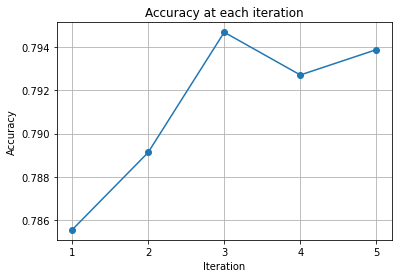

Final Accuracy: 0.7938775510204081

Final DataFrame:
            0         1         2         3         4         5         6  \
716  0.754763 -0.068853  0.024147 -0.765977  0.391740  1.027079  2.334869   
351 -0.987573 -0.819565 -1.764514 -0.765977 -0.575737 -0.704926 -0.428290   
936 -0.987573 -0.895415  0.024147 -0.765977 -0.663689 -0.704926 -0.428290   
256  0.256953 -0.208150  0.918477 -0.765977 -0.048022  1.027079 -0.428290   
635 -0.738668 -0.665736  0.918477  1.046987  1.007407  2.759084  2.334869   
..        ...       ...       ...       ...       ...       ...       ...   
513 -0.738668 -0.952126  0.918477  1.046987 -1.367309  1.027079 -0.428290   
761 -0.240857 -0.406638  0.918477  1.046987 -1.015499  1.027079 -0.428290   
101  1.252574 -0.336104  0.918477  1.046987 -1.015499 -0.704926 -0.428290   
289  0.256953 -0.796526  0.918477  1.046987  1.095360 -0.704926 -0.428290   
261  0.256953 -0.591303  0.918477  1.046987  1.711027 -0.704926 -0.428290   

       7    8    9  ..

In [9]:
import matplotlib.pyplot as plt

# Initialize list to store accuracies at each iteration
accuracies = []

# Implement the active learning loop.
num_iterations = 5
batch_size = 20

for iteration in range(num_iterations):
    model = LogisticRegression()
    model.fit(X_labeled, y_labeled)

    # Calculate and store the accuracy on the labeled data at this iteration
    accuracy = accuracy_score(y_labeled, model.predict(X_labeled))
    accuracies.append(accuracy)

    if len(X_unlabeled) == 0:
        print("No samples remaining in the unlabeled pool. Stopping active learning loop.")
        break

    probabilities = model.predict_proba(X_unlabeled)

    indices = entropy_sampling(probabilities)[:min(batch_size, len(X_unlabeled))]
    
    # Convert indices to actual indices in X_unlabeled and y_unlabeled
    actual_indices = np.arange(len(X_unlabeled))[indices]
    
    X_newly_labeled = X_unlabeled.iloc[actual_indices]
    y_newly_labeled = y_unlabeled.iloc[actual_indices]
    
    X_labeled = pd.concat([X_labeled, X_newly_labeled])
    y_labeled = pd.concat([y_labeled, y_newly_labeled])
    
    X_unlabeled = X_unlabeled.drop(X_unlabeled.index[actual_indices])
    y_unlabeled = y_unlabeled.drop(y_unlabeled.index[actual_indices])

# Plot accuracy at each iteration
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy at each iteration')
plt.xticks(range(1, len(accuracies) + 1))
plt.grid(True)
plt.show()

# Print final accuracy
print("Final Accuracy:", accuracies[-1])

# Concatenate labeled data with the target variable
labeled_data = pd.concat([X_labeled, y_labeled], axis=1)
unlabeled_data = pd.concat([X_unlabeled, y_unlabeled], axis=1)
# Display final dataframe
print("\nFinal DataFrame:")
print(labeled_data)

The final output is an updated labeled dataset containing additional instances labeled during each iteration of Active Learning. The process aims to improve model performance by iteratively selecting and labeling the most informative instances from the unlabeled data. In the above code, the success and effectiveness of Active Learning depend on the custom function least_confidence and the characteristics of the dataset. The least_confidence function is assumed to return indices corresponding to the least confident predictions.

Note that this code uses the least_confidence function to perform active learning. To perform the same process using margin_sampling or entropy_sampling instead of least_confidence, you could replace least_confidence(probabilities)[:batch_size] with margin_sampling(probabilities)[:batch_size] or entropy_sampling(probabilities)[:batch_size].

Let’s compare the performance of each of the three active learning functions on the same sample from credit-g. We use Matplotlib to produce visual representations of the accuracy for each of the three active learning functions. 

These two methods may yield the same results in certain scenarios, especially when working with binary classification problems. Here's why:

The Least Confidence method considers the class with the highest predicted probability. If the model is very confident about a particular class (i.e., the probability is close to 1), then it's less likely that this instance will be selected for labeling.
Entropy Sampling considers the entropy or "disorder" of the predicted probabilities. For binary classification problems, entropy is maximized when the probabilities are both equal (i.e., the model is completely unsure which class to predict). This could coincide with low-confidence predictions.

As a result, both methods might often select the same instances for labeling in the context of binary classification. However, this might not always be the case, especially for multi-class problems.

On the other hand, Margin Sampling focuses on the difference between the highest and second-highest predicted probabilities. Even slight differences in these probabilities can lead to different instances being selected compared to the other methods.
In the next section, we'll explore Query by Committee for labeling—a method that brings together a group of models to help decide which data points are most important for labeling.


### Query By Committee (QBC)

QBC is based on the idea that instances for which the committee of models disagrees or exhibits high uncertainty are the most informative and should be prioritized for labelling. Instead of relying on a single model's prediction, QBC takes advantage of the diversity and collective decision-making of the committee to make informed labelling decisions.

The QBC process typically involves the following steps:

1.	Committee Creation: Create an initial committee of multiple models trained on the available labelled data. Models in a committee can be diverse in terms of their architectures, initializations, or training methodologies.
2.	Instance Selection: Apply the committee of models to the unlabelled instances and obtain predictions. Choose the instances that elicit the most disagreement or uncertainty among the committee members for labelling.
3.	Committee Update: Label the selected instances and add them to the labelled dataset. Re-train or update the committee of models using the expanded labelled dataset.
4.	Repeat: Iterate the process by returning to step 2 until a desired performance level is achieved or labelling resources are exhausted.

QBC offers several advantages in active learning for labelling:

- Model Diversity: QBC utilizes a committee of models, allowing for diverse perspectives and capturing different aspects of the data distribution. This diversity helps identify instances that are challenging or ambiguous, leading to improved labelling decisions.
- Model Confidence Estimation: By observing the disagreement or uncertainty among the committee members, QBC provides an estimate of the models' confidence in their predictions. Instances that lead to disagreement or uncertainty can be considered more informative and valuable for labelling.
- Labelling Efficiency: QBC aims to prioritize instances that have the greatest impact on the committee's decision. This approach can save labelling efforts by focusing on instances that provide the most relevant information to improve the model's performance.

Let’s implement this approach using the ‘credit-g’ dataset in Python. First, we define functions for creating the committee, obtaining committee predictions, and measuring disagreement or uncertainty among the committee members.

The create_committee(num_models) function creates a committee of logistic regression models. The number of models in the committee is specified by num_models.

The get_committee_predictions(committee, data) function gets predictions from each model in the committee for the provided data. It returns an array of prediction probabilities.

The measure_disagreement(predictions) function measures the disagreement among the committee's predictions. It calculates the variance of the predictions and returns the mean disagreement.

In [10]:
def create_committee(num_models):
    committee = []
    for _ in range(num_models):
        model = LogisticRegression()
        # Customize and train each model as needed
        committee.append(model)
    return committee

def get_committee_predictions(committee, data):
    predictions = []
    for model in committee:
        preds = model.predict_proba(data)
        predictions.append(preds)
    return np.array(predictions)

def measure_disagreement(predictions):
    disagreement = np.var(predictions, axis=0)
    return np.mean(disagreement, axis=1)

We enter the active learning loop, where we iteratively train the committee, measure disagreement or uncertainty, select instances for labelling, obtain labels for those instances, and update the labelled dataset.

In [11]:
labeled_dataset = labeled_data.copy()

num_iterations = 5
batch_size = 20
committee = create_committee(num_models=3)

for _ in range(num_iterations):
    for model in committee:
        X_train = labeled_dataset.drop('target', axis=1)
        y_train = labeled_dataset['target']
        model.fit(X_train, y_train)
    X_unlabeled = unlabeled_data.drop('target', axis=1)
    if len(X_unlabeled) == 0:
        print("No samples remaining in the unlabeled pool. Stopping active learning loop.")
        break
    committee_predictions = get_committee_predictions(committee, X_unlabeled)
    disagreement = measure_disagreement(committee_predictions)
    indices = np.argsort(disagreement)[-batch_size:]
    labeled_instances = unlabeled_data.iloc[indices]
    labels = labeled_instances['target']
    labeled_dataset = pd.concat([labeled_dataset, labeled_instances])
    unlabeled_data = unlabeled_data.drop(labeled_instances.index)  

No samples remaining in the unlabeled pool. Stopping active learning loop.


Here’s an explanation of the code:

labeled_dataset = labeled_data.copy(): This line creates a copy of the initial labeled dataset.
The loop over num_iterations represents the number of rounds of semi-supervised learning. In each round, the following steps occur:

1.	Each model in the committee is trained on the current labeled dataset.
2.	The committee makes predictions on the unlabeled data.
3.	The disagreement among the committee's predictions is calculated.
4.	The indices of the instances with the highest disagreement are identified. The size of this batch is specified by batch_size.
5.	These instances are added to the labeled dataset.
6.	Finally, these instances are removed from the unlabeled data.

The idea behind this approach is that the instances the models disagree about the most are the ones where the models are most uncertain. By adding these instances to the labeled dataset, the models can learn more from them in the next round of training. This process continues for a specified number of iterations.

Now let’s discuss Diversity Sampling in labeling—a smart technique that focuses on selecting a varied set of data points to ensure a well-rounded and representative labeled dataset.


### Diversity Sampling
Diversity sampling is based on the principle that selecting instances that cover diverse patterns or regions in the dataset can provide a more comprehensive understanding of the underlying data distribution. By actively seeking diverse instances for labelling, diversity sampling aims to improve model generalization and robustness.

The diversity sampling process typically involves the following steps:

1.	Initial Model Training: Train an initial machine learning model using a small, labelled dataset. This model will be used to guide the selection of diverse instances for labelling.
2.	Instance Selection: Apply the trained model to the unlabelled instances and obtain predictions. Calculate a diversity metric to measure the dissimilarity or coverage of each instance with respect to the already labelled instances. Select instances with the highest diversity metric for labelling. 
3.	Labelling and Model Update: Label the selected instances and add them to the labelled dataset. Retrain or update the machine learning model using the expanded labelled dataset.
4.	Repeat: Iterate the process by returning to step 2 until a desired performance level is achieved or labelling resources are exhausted.

Diversity sampling offers several advantages in active learning for labelling:

- Comprehensive Data Coverage: By selecting diverse instances, diversity sampling ensures that the labelled dataset covers a wide range of patterns or regions in the data. This approach helps the model generalize better to unseen instances and improves its ability to handle different scenarios. 
- Exploration of Data Distribution: Diversity sampling encourages the exploration of the underlying data distribution by actively seeking instances from different parts of the feature space. This exploration can reveal important insights about the data and improve the model's understanding of complex relationships.
- Mitigation of Bias and Overfitting: Diversity sampling can help mitigate biases and overfitting that may arise from selecting only easy or similar instances for labelling. By diversifying the labelled dataset, diversity sampling reduces the risk of model overconfidence and enhances its robustness.

Let’s explore this approach on our preprocessed 'credit-g'’ dataset, using pairwise distances from sklearn library in Python. The pairwise_distances function from sklearn calculates the distance between each pair of instances in a dataset. In the context of diversity sampling, this function is used to find instances that are most different from each other.

Here's the process:

1.	Compute the pairwise distances between all pairs of instances in the unlabeled dataset.
2.	Identify the instances that have the greatest distances between them. These are the most diverse instances according to the distance metric used.
3.	Select these diverse instances for labeling and add them to the labeled dataset.

The idea is that by actively seeking out diverse instances (those that are farthest apart in terms of the chosen distance metric), you can cover a wider range of patterns in the underlying data distribution. This helps to improve the model's ability to generalize to new data and enhances its robustness.

First, we import the pairwise_distances function.


In [21]:
from sklearn.metrics.pairwise import pairwise_distances

We define functions for calculating diversity and selecting instances with the highest diversity for labelling. We will use pairwise Euclidean distance as the diversity metric.

In [22]:
def calculate_diversity(data):
    distance_matrix = pairwise_distances(data, metric='euclidean')
    diversity = np.sum(distance_matrix, axis=1)
    return diversity

def select_diverse_instances(data, num_instances):
    diversity = calculate_diversity(data)
    indices = np.argsort(diversity)[-num_instances:]
    return data.iloc[indices]


We enter the active learning loop, where we iteratively calculate diversity, select diverse instances for labelling, obtain labels for those instances, and update the labelled dataset.

In [24]:
labeled_dataset = labeled_data.copy()
num_iterations = 5
batch_size = 20
for _ in range(num_iterations):
    X_unlabeled = unlabeled_data.drop('target', axis=1)
    if len(X_unlabeled) == 0:
        print("No samples remaining in the unlabeled pool. Stopping active learning loop.")
        break
    diversity = calculate_diversity(X_unlabeled)
    labeled_instances = select_diverse_instances(unlabeled_data, batch_size)
    labels = labeled_instances['target']
    labeled_dataset = pd.concat([labeled_dataset, labeled_instances])
    unlabeled_data = unlabeled_data.drop(labeled_instances.index)

No samples remaining in the unlabeled pool. Stopping active learning loop.


In the next section, we'll explore Transfer Learning in labeling—an advanced method that leverages knowledge gained from one task to improve performance on a different but related task.

### Transfer Learning
Transfer learning involves using knowledge gained from a source task or domain to aid learning in a target task or domain. Instead of starting from scratch, transfer learning leverages pre-existing information, such as labelled data or pre-trained models, to bootstrap the learning process and improve the performance of the target task. Transfer learning offers several advantages in the labelling process of machine learning:

- Reduced Labelling Effort: By leveraging pre-existing labelled data, transfer learning reduces the need for manual labelling of a large amount of data for the target task. It enables the reuse of knowledge from related tasks, domains, or datasets, saving time and effort in acquiring new labels.
- Improved Model Performance: Transfer learning allows the target model to benefit from the knowledge learned by a source model. The source model might have been trained on a large, labelled dataset or a different but related task, providing valuable insights and patterns that can enhance the target model's performance.
- Adaptability to Limited Labelled Data: Transfer learning is particularly useful when the target task has limited labelled data. By leveraging labelled data from a source task or domain, transfer learning can help generalize the target model better and mitigate the risk of overfitting on a small, labelled dataset.

Transfer learning can be applied in various ways for labelling in machine learning:

- Feature Extraction: Utilize pre-trained models as feature extractors. Extract high-level features from pre-trained models and feed them as inputs to a new model that is trained on the target labelled dataset.
- Fine Tuning Pre-trained Models: Use pre-trained models that have been trained on large, labelled datasets, such as models from popular deep learning architectures like VGG, ResNet, or BERT. Fine-tune these pre-trained models on a smaller labelled dataset specific to the target task.

Let's discuss them in more detail.

#### Feature Extraction
Feature extraction involves using the representations learned by a pre-trained model as input features for a new model. This approach is particularly useful when the pre-trained model has been trained on a large, general-purpose dataset such as ImageNet. Here's an example of using transfer learning for image labelling using the VGG16 model. We first import necessary libraries.


In [136]:
import PIL
import PIL.Image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

We will use an image of Golden Retriever for labelling. We can view this image using PIL library as below.

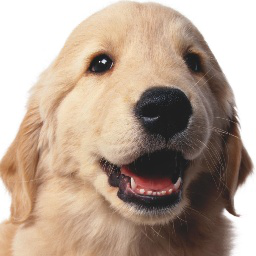

In [137]:
PIL.Image.open('path_to_image_2.jpg')

Let’s load the pre-trained VGG16 model from TensorFlow library and predict the label for this sample image.

In [138]:
model = VGG16(weights='imagenet')
img_path = 'path_to_image_2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = model.predict(x)
decoded_predictions = decode_predictions(features, top=5)[0]
for _, label, confidence in decoded_predictions:
    print(label, confidence)

1/1 [==============================] - 1s 881ms/step
golden_retriever 0.92119014
kuvasz 0.02359655
Tibetan_mastiff 0.014449641
Labrador_retriever 0.011605156
Great_Pyrenees 0.0065631066


The model has correctly predicted the image as golden_retriever with 0.92119014 confidence. We now understand how a pre-trained model can be used on a new dataset. 

### Fine Tuning Pre-trained Models
Fine-tuning in transfer learning refers to the process of adapting or updating the pre-trained model's parameters to better fit a specific task or dataset of interest. When using transfer learning, the pre-trained model is initially trained on a large-scale dataset, typically from a different but related task or domain. Fine-tuning allows us to take advantage of the knowledge learned by the pre-trained model and customize it for a specific task or dataset.

The fine-tuning process typically involves the following steps:

1.	Pre-trained Model Initialization: The pre-trained model, which has already learned useful representations from a source task or dataset, is loaded. The model's parameters are frozen initially, meaning they are not updated during the initial training.
2.	Modification of the Model: Depending on the specific task or dataset, the last few layers or specific parts of the pre-trained model may be modified or replaced. The architecture of the model can be adjusted to match the desired output or accommodate the characteristics of the target task.
3.	Unfreezing and Training: After modifying the model, the previously frozen parameters are unfrozen, allowing them to be updated during training. The model is then trained on the target task-specific dataset, often referred to as the fine-tuning dataset. The weights of the model are updated using backpropagation and gradient-based optimization algorithms to minimize the task-specific loss function.
4.	Training with a Lower Learning Rate: During fine-tuning, a smaller learning rate is typically used compared to the initial training of the pre-trained model. This smaller learning rate helps to ensure that the previously learned representations are preserved to some extent while allowing the model to adapt to the target task or dataset.

The process of fine-tuning strikes a balance between utilizing the knowledge captured by the pre-trained model and tailoring it to the specifics of the target task. By fine-tuning, the model can learn task-specific patterns and optimize its performance for the new task or dataset. The amount of fine-tuning required may vary depending on the similarity between the source and target tasks or domains. In some cases, only a few training iterations may be sufficient, while in others, more extensive training may be necessary.

Fine-tuning is a crucial step in transfer learning as it enables the transfer of knowledge from a source task or dataset to a target task, resulting in improved performance and faster convergence on the target task. Here's an example of using transfer learning for image labelling using the VGG16 model. We first import the necessary libraries.


In [139]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

We have 2 classes of images that of dogs and cats and therefore we set the number of classes variable as 2. We will also load pre-trained VGG16 model without the top layers. The image sizes we have here are of 256X256X3

In [140]:
num_classes = 2
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

We now freeze the pre-trained layers and create a new model for fine tuning. We then compile the model using ‘adam’ as optimizer:

In [148]:
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

To prepare for training, we are configuring data generators for both training and validation datasets. This crucial step involves rescaling pixel values to a range between 0 and 1 using ImageDataGenerator. By doing so, we ensure consistent and efficient processing of image data, enhancing the model's ability to learn patterns and features during training.:

In [153]:
train_data_dir = '/path_to_validation_data/'
validation_data_dir = '/path_to_validation_data/'
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0/255.0)  
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical')   

Found 160 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


We can now fine-tune the model and save it.

In [154]:
epochs = 10
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)
model.save('fine_tuned_model.h5')

Epoch 1/10
5/5 [==============================] - 122s 27s/step - loss: 5.3242 - accuracy: 0.6812 - val_loss: 0.2449 - val_accuracy: 0.9375
Epoch 2/10
5/5 [==============================] - 116s 25s/step - loss: 1.2768 - accuracy: 0.7188 - val_loss: 1.2135 - val_accuracy: 0.8062
Epoch 3/10
5/5 [==============================] - 115s 26s/step - loss: 1.1701 - accuracy: 0.8250 - val_loss: 0.1316 - val_accuracy: 0.9688
Epoch 4/10
5/5 [==============================] - 117s 26s/step - loss: 0.0648 - accuracy: 0.9688 - val_loss: 0.4089 - val_accuracy: 0.8438
Epoch 5/10
5/5 [==============================] - 116s 26s/step - loss: 0.2113 - accuracy: 0.9125 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 117s 26s/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0493 - val_accuracy: 0.9750
Epoch 7/10
5/5 [==============================] - 115s 26s/step - loss: 0.0700 - accuracy: 0.9750 - val_loss: 0.0528 - val_accuracy: 0.9750
Epoch 8/10
5/5 [====

With this saved model, we can deploy it for various applications, such as making predictions on new data, integrating it into larger systems, or further fine-tuning on similar tasks. The saved model file encapsulates the learned patterns and features from the training process, providing a valuable resource for future use and analysis.
In the next section, we'll delve into the concept of semi-supervised learning in labeling—a sophisticated yet approachable technique that combines the strengths of both labeled and unlabeled data.

### Semi-Supervised Learning
Traditional supervised learning relies on a fully labelled dataset, which can be time-consuming and costly to obtain. Semi-supervised learning, on the other hand, allows us to leverage both labelled and unlabelled data to train models and make predictions. This approach offers a more efficient way to label data and improve model performance.

Semi-supervised learning is particularly useful when labelled data is scarce or expensive to obtain. It allows us to make use of the vast amounts of readily available unlabelled data, which is often abundant in real-world scenarios. By leveraging unlabelled data, semi-supervised learning offers several benefits:

- Cost-Effectiveness: Semi-supervised learning reduces the reliance on expensive manual labelling efforts. By using unlabelled data, which can be collected at a lower cost, we can significantly reduce the expenses associated with acquiring labelled data.
- Utilization of Large Unlabelled Datasets: Unlabelled data is often abundant and easily accessible. Semi-supervised learning enables us to tap into this vast resource, allowing us to train models on much larger datasets compared to fully supervised learning. This can lead to better model generalization and performance.
- Improved Model Performance: By incorporating unlabelled data during training, semi-supervised learning can improve model performance. The unlabelled data provides additional information and helps the model capture the underlying data distribution more accurately. This can lead to better generalization and increased accuracy on unseen data.

There are different approaches within semi-supervised learning that leverage the unlabelled data in different ways. Some common methods include:

- Self-Training: Self-training involves training a model initially on the limited labelled data. Then, the model is used to make predictions on the unlabelled data, and the confident predictions are considered as pseudo-labels for the unlabelled instances. These pseudo-labelled instances are then combined with the labelled data to retrain the model iteratively.
- Co-Training: Co-training involves training multiple models on different subsets or views of the data. Each model learns from the labelled data and then predicts labels for the unlabelled data. The agreement or disagreement between the models' predictions on the unlabelled data is used to select the most confident instances, which are then labelled and added to the training set for further iterations.
- Generative Models: Generative models, such as Variational Autoencoders (VAEs) or Generative Adversarial Networks (GANs), can be used in semi-supervised learning. These models learn the underlying data distribution and generate plausible instances. By incorporating the generated instances into the training process, the model can capture more diverse representations and improve its generalization performance.

Let’s see a simple implementation in Python of this labelling approach. First, we import necessary libraries.


In [141]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import LabelPropagation

We utilize the preprocessed ‘credit-g’ dataset from previous examples, and split it into labelled and unlabeled subsets. This example assumes that you are using the dataframe ‘df_preprocessed’ we created in the section on Uncertainty Sampling.

In [142]:
X = df_preprocessed.drop('target', axis=1)
y = df_preprocessed['target']

# Split the dataset into labelled and unlabelled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

labeled_percentage = 0.1  # Percentage of labeled data
X_train_labeled, X_train_unlabeled, y_train_labeled, _ = train_test_split(
    X_train, y_train, test_size=1 - labeled_percentage, random_state=42)

Then we train a supervised machine learning model using the labelled data. In this example, we will use logistic regression as the supervised model.

In [143]:
supervised_model = LogisticRegression()
supervised_model.fit(X_train_labeled, y_train_labeled)  

LogisticRegression()

We then apply the trained supervised model to predict labels for the unlabelled data. The predicted labels are considered as pseudo-labels for the unlabelled instances.

In [144]:
# Predict labels for the unlabelled data 

pseudo_labels = supervised_model.predict(X_train_unlabeled)

Now concatenate the labelled data (X_labeled) with the pseudo-labelled data (X_unlabeled) to create the combined feature dataset (X_combined). Concatenate the corresponding labels (y_labeled and pseudo_labels) to create the combined label dataset (y_combined).

In [145]:
# Concatenate the labelled data with the pseudo-labelled data 

X_combined = np.concatenate((X_labeled, X_unlabeled))
y_combined = np.concatenate((y_labeled, pseudo_labels))   

Next step is to train a semi-supervised machine learning model using the combined feature dataset (X_combined) and label dataset (y_combined). In this example, we will use LabelPropagation as the semi-supervised model.

In [146]:
semi_supervised_model = LabelPropagation()
semi_supervised_model.fit(X_combined, y_combined)

LabelPropagation()

Use the trained semi-supervised model to make predictions on the test set and calculate the accuracy.

In [147]:
y_pred = semi_supervised_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

Test accuracy: 0.830


The print statement outputs the resulting accuracy score which in this case is 0.635.
After training our semi_supervised_model using LabelPropagation, the resulting model has effectively learned from both labeled and unlabeled data. The predictions on the test set (y_pred) showcase the model's ability to generalize and infer labels for previously unseen instances. This output serves as a valuable demonstration of how semi-supervised learning techniques, leveraging both labeled and unlabeled data, can contribute to robust and accurate predictions in real-world scenarios.